In [4]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from plotnine import *
from plotnine.data import *


import be_load

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


reached exception:pyaudio
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
reached exception:optimization_calibration


In [5]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [6]:
(etsamples,etmsgs,etevents) = be_load.load_data()

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [7]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW

In [8]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


## Blink Analysis

In [7]:
#%% Do Blink Analysis
blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 
CRITICAL:functions.e

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


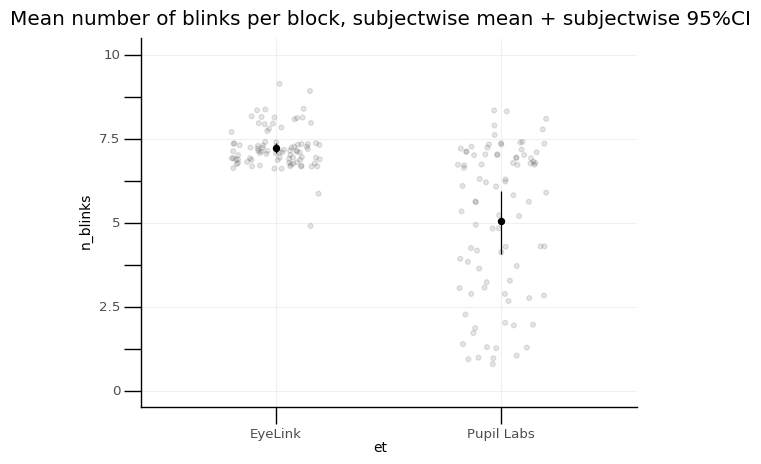

In [8]:
BLINK.plot_count(blink)

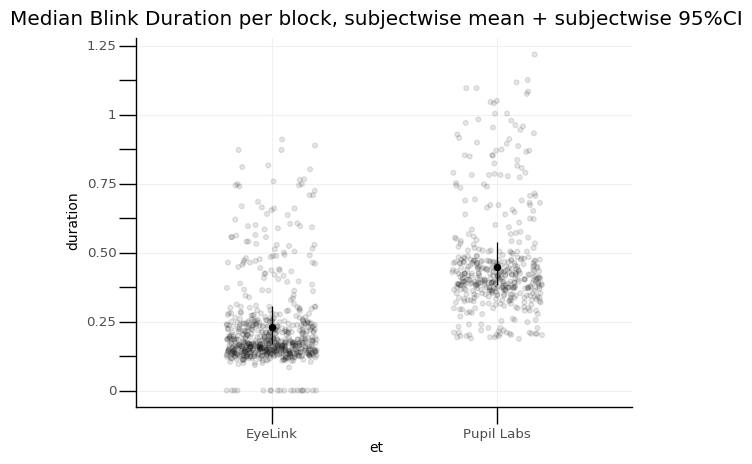

In [9]:
BLINK.plot_duration(blink)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


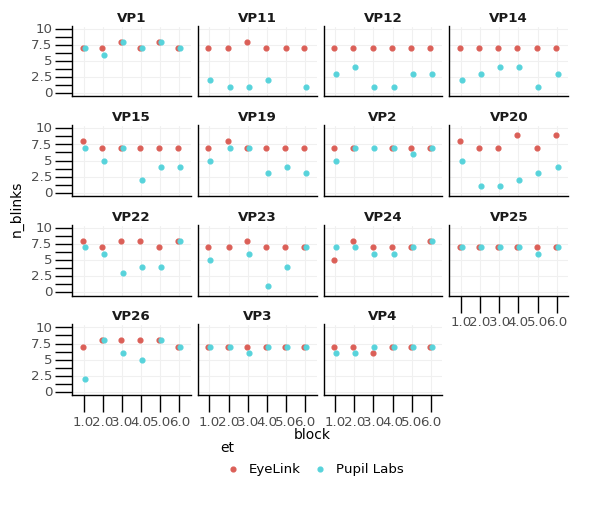

In [10]:
BLINK.plot_count(blink,option="facet_subjects")

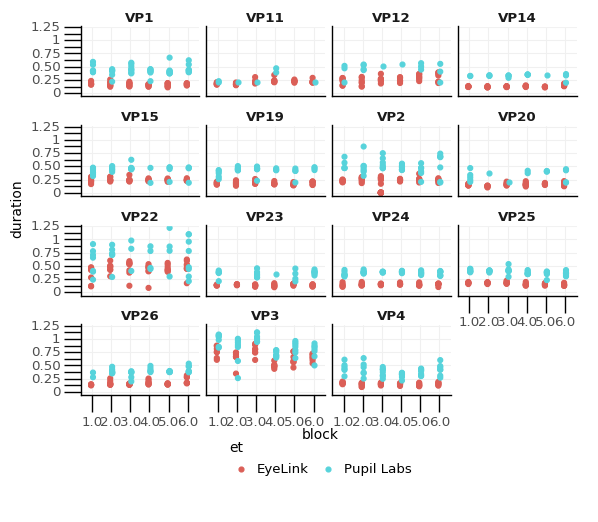

In [11]:
BLINK.plot_duration(blink,option="facet_subjects")

# Smooth Pursuit

In [16]:
cfg = {'redo':True} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

In [192]:
import SMOOTH
%autoreload 2
%matplotlib inline


Plot some single trials first

In [17]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8875299d4f0849455d5b6cf28abae5ce NOW.


msg 0 from 1


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


fixing pupillab camera lag of 40ms (according to pupillabs)


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


msg 0 from 1


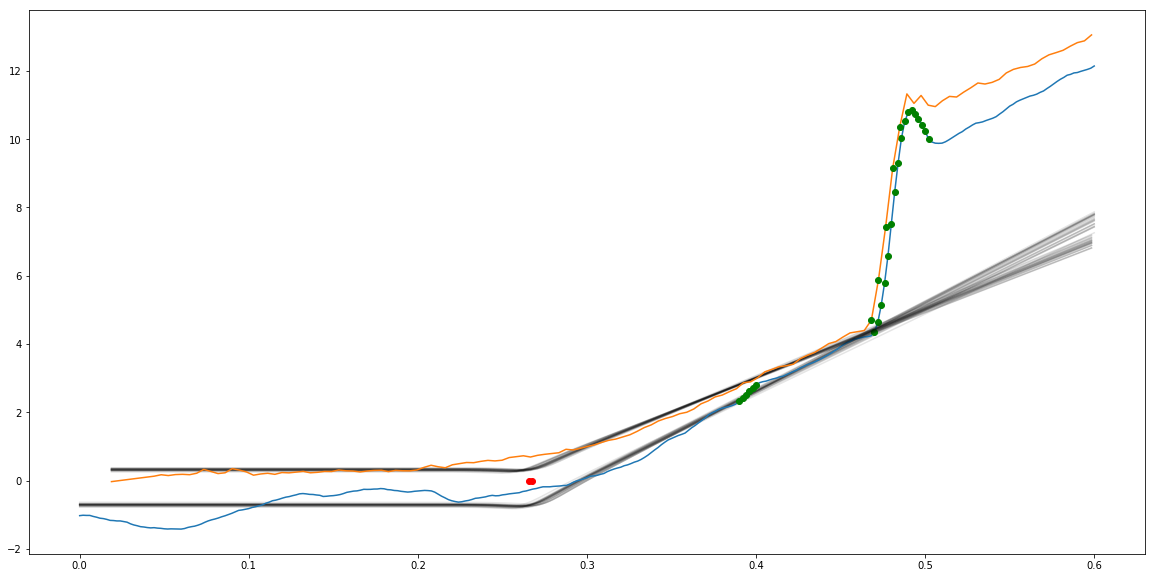

In [160]:
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP1','el',5,1,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP1','pl',5,1,smooth_stanmodel) # trial 1, block 1

Main Results follow. First latency, then estimated velocity

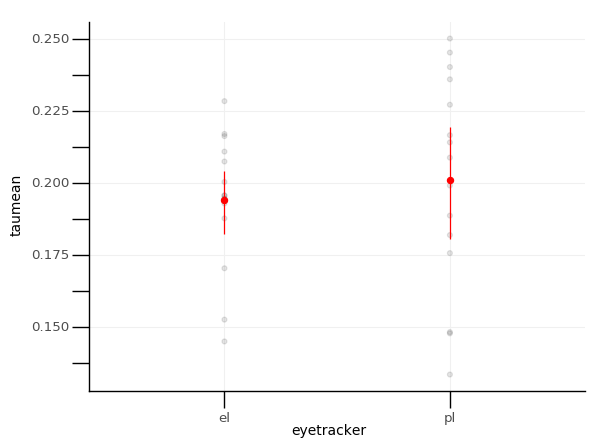

In [193]:
SMOOTH.plot_init_latency(smoothresult,option="")

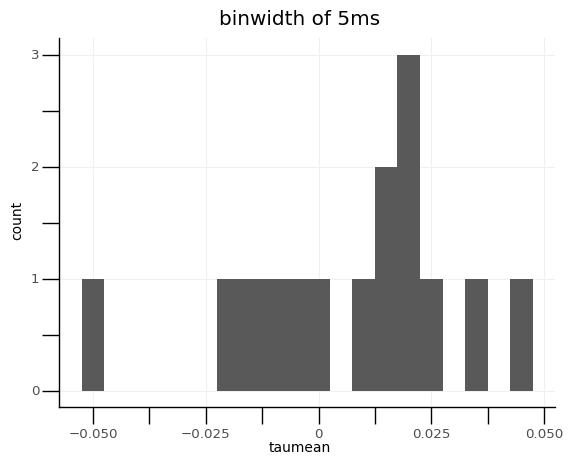

In [196]:
SMOOTH.plot_init_latency(smoothresult,option="difference")

# Large Grid

In [13]:
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition='LARGE_GRID')

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP1 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP2 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP3 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP4 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP11 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP12 
CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: pl    Subject: VP14 
CRITICAL:functions.et_condition_df:Eyetracker: el    Sub

In [170]:
# plot accuracy    
LARGE_GRID.plot_accuracy(raw_large_grid_df, option=None)


# investigate on the position and properties of detected fixations
#LARGE_GRID.display_fixations(raw_large_grid_df, option='fixations')
#LARGE_GRID.display_fixations(raw_large_grid_df, option='accuracy_for_each_element')
#LARGE_GRID.display_fixations(raw_large_grid_df, option='precision_for_each_element')

In [180]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset')

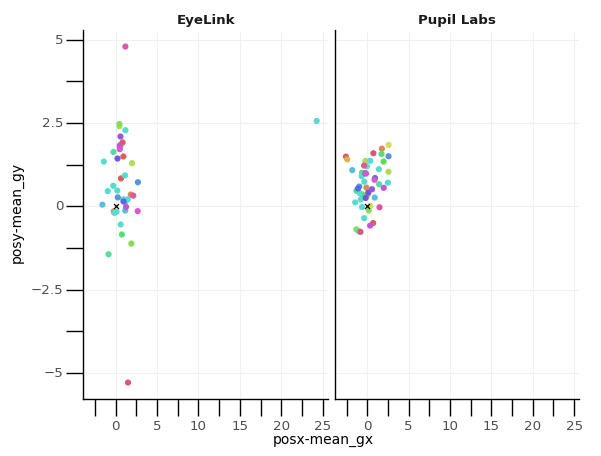

In [189]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df,'VP1',2) 

In [190]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df) 

In [226]:
raw_large_grid_df.iloc[1:2]

,block,element,type,end_time,mean_gx,duration,start_time,rms,mean_gy,condition,exp_event,grid_size,msg_time,posx,posy,hori_accuracy,vert_accuracy,accuracy,et,eyetracker,subject
1,1.0,2.0,fixation,64.507,-25.209025,0.244,64.263,0.016239,-6.048871,GRID,element,49.0,62.95,-24.751435,-5.162292,0.457591,0.886578,0.591233,EyeLink,el,VP1


In [227]:
etmsgs.iloc[1:2]

,angle,block,condition,element,exp_event,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,algorithm,eyetracker,subject,beep
1,NaN,NaN,METAEX,NaN,NaN,NaN,NaN,-117.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN


In [228]:
etsamples.iloc[1:2]

,gy,gx,gy_vel,pa,gx_vel,smpl_time,confidence,type,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject
1,-19.970883,-0.764314,100000000.0,551.0,100000000.0,29.345,NaN,smoothpursuit,False,False,False,0,hmm,el,VP1


In [15]:
def plot_around_event(etsamples,etmsgs,etevents,raw_large_grid_df,plusminus=(-1,1)):
    import re
    t0 = raw_large_grid_df.start_time
    
    tstart = t0 + plusminus[0]
    tend = t0 + plusminus[1]
    query = "subject == @raw_large_grid_df.subject"# & eyetracker==@raw_large_grid_df.eyetracker"
    samples_query = "smpl_time>=@tstart & smpl_time <=@tend & "+query
    msg_query     = "msg_time >=@tstart & msg_time  <=@tend & "+query
    etmsgs = etmsgs.query(msg_query)
    
    longstring = etmsgs.to_string(columns=['exp_event','posx','posy'],na_rep='',float_format='%.1f',index=False,header=False,col_space=0)
    longstring = re.sub(' +',' ',longstring)
    splitstring = longstring.split(sep="\n")
    etmsgs.loc[:,'label'] = splitstring
    (ggplot(etsamples.query(samples_query),aes(x='smpl_time',y='gx',color='type',shape="eyetracker"))
     + geom_point()

     + geom_text(aes(x='msg_time',y=0,label="label"),color='black',position=position_jitter(height=10),data=etmsgs)
     + geom_vline(aes(xintercept='msg_time'),data=etmsgs)
     + annotate("line",x=[raw_large_grid_df.start_time,raw_large_grid_df.end_time],y=0,color='black')
     + annotate("point",x=[raw_large_grid_df.start_time,raw_large_grid_df.end_time],y=0,color='black')
     + annotate("text",x=raw_large_grid_df.end_time,y=raw_large_grid_df.posx+5,label=raw_large_grid_df.accuracy)
     + geom_hline(yintercept=raw_large_grid_df.posx)
     #+ facet_grid("~eyetracker")
    ).draw()
    geom_text()


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


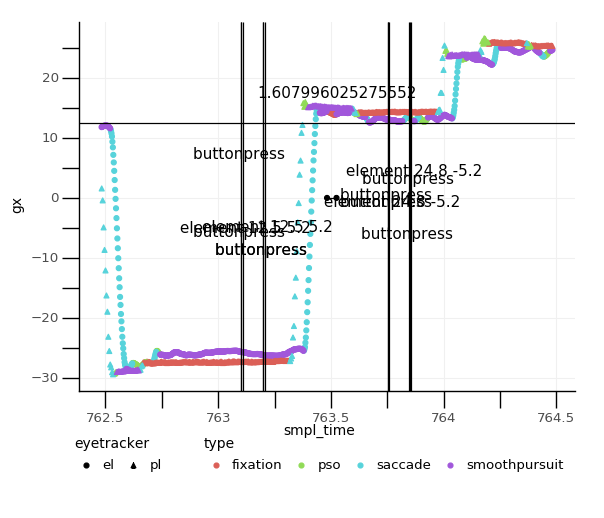

In [16]:
plot_around_event(etsamples,etmsgs,etevents,raw_large_grid_df.iloc[50],plusminus=(-1,1))

In [307]:
# use magic to get start and end times of fixations in a temporary column
eventtype='fixation'
etsamples['tmp'] = (1*(etsamples['type'] == eventtype)).diff()
etsamples['tmp'].iloc[0] = 0
etsamples['tmp'] = etsamples['tmp'].astype(int)

if etsamples['tmp'][np.argmax(etsamples['tmp'] != 0)] == -1:  #argmax stops at first true
    # if we only find an fixation end, add a start at the beginning
    etsamples.iloc[0, etsamples.columns.get_loc('tmp')] = 1


etsamples.iloc[0, etsamples.columns.get_loc('tmp')] = etsamples.iloc[0].type==eventtype


# make a list of the start and end times
start_times_list = list(etsamples.loc[etsamples['tmp'] == 1, 'smpl_time'].astype(float))
end_times_list   = list(etsamples.loc[etsamples['tmp'] == -1, 'smpl_time'].astype(float))

# drop the temporary column

# add them as columns to a fixationevent df
events = pd.DataFrame([start_times_list, end_times_list], ['start_time', 'end_time']).T

# delete event if start or end is NaN


# add the type    
events['type'] = eventtype
events['duration'] = events['end_time'] - events['start_time']
events = pd.concat([events,etsamples.loc[etsamples['tmp'] == 1, 'gx'].astype(float).reset_index(drop=True).rename('start_gx')],axis=1)
events = pd.concat([events,etsamples.loc[etsamples['tmp'] == 1, 'gy'].astype(float).reset_index(drop=True).rename('start_gy')],axis=1)
events = pd.concat([events,etsamples.loc[etsamples['tmp'] == -1, 'gx'].astype(float).reset_index(drop=True).rename('end_gx')],axis=1)
events = pd.concat([events,etsamples.loc[etsamples['tmp'] == -1, 'gy'].astype(float).reset_index(drop=True).rename('end_gy')],axis=1)

events.dropna(subset=['start_time', 'end_time'], inplace=True) 
events

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


,start_time,end_time,type,duration,start_gx,start_gy,end_gx,end_gy
0,30.48100,30.63100,fixation,0.1500,-0.869733,12.417581,-0.790669,12.443628
1,31.50500,31.68500,fixation,0.1800,-11.792069,7.789374,-12.391532,7.526989
2,31.69900,31.73700,fixation,0.0380,-14.224646,7.553231,-13.484427,7.697548
3,31.77300,31.93100,fixation,0.1580,-6.844424,7.540110,-7.093882,7.710667
4,32.13900,32.18100,fixation,0.0420,-1.515385,7.579472,-1.409978,7.684430
5,32.33500,32.64700,fixation,0.3120,3.464765,6.805030,9.898364,6.975726
6,32.76300,32.91500,fixation,0.1520,13.497423,6.883817,13.445436,6.765635
7,33.22100,33.38500,fixation,0.1640,-13.991018,5.359546,-13.692325,5.293799
8,34.52900,34.55700,fixation,0.0280,8.772568,4.965008,8.680855,4.899240
9,35.56700,35.66500,fixation,0.0980,-12.912253,4.241388,-13.406443,4.412458


,angle,block,condition,element,exp_event,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,algorithm,eyetracker,subject,beep
0,NaN,NaN,METAEX,NaN,NaN,NaN,NaN,-117.679000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
1,NaN,NaN,METAEX,NaN,NaN,NaN,NaN,-117.679000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
2,NaN,NaN,Connect,NaN,ConnectPupil,NaN,NaN,-117.677000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
3,NaN,NaN,v,NaN,NaN,NaN,NaN,-114.141000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
4,NaN,NaN,C,NaN,NaN,NaN,NaN,-114.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
5,NaN,NaN,!CAL,NaN,NaN,NaN,NaN,-92.955000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
6,NaN,NaN,!CAL,NaN,NaN,NaN,NaN,-92.955000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
7,NaN,NaN,!CAL,NaN,NaN,NaN,NaN,-92.955000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
8,NaN,NaN,!CAL,NaN,NaN,NaN,NaN,-92.955000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
9,NaN,NaN,!CAL,NaN,NaN,NaN,NaN,-92.954000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,el,VP1,NaN
